In [1]:
# MS571 - Aprendizado de Máquinas: Aspectos Teóricos e Práticos
# Projeto 2 - Análise de Componentes Principais e Sistemas de Recomendação

# Autores:
# Amanda Rocha Faga - RA: 212573
# Caique Oliveira Alves da Silva - RA: 168023

In [2]:
# Importação das bibliotecas utilizadas:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
from scipy.optimize import minimize

# Parte I - Análise de Componentes Principais:

In [3]:
# Importação dos exemplos rotulados:
dado1 = loadmat("dado1.mat")
X = dado1["X"]

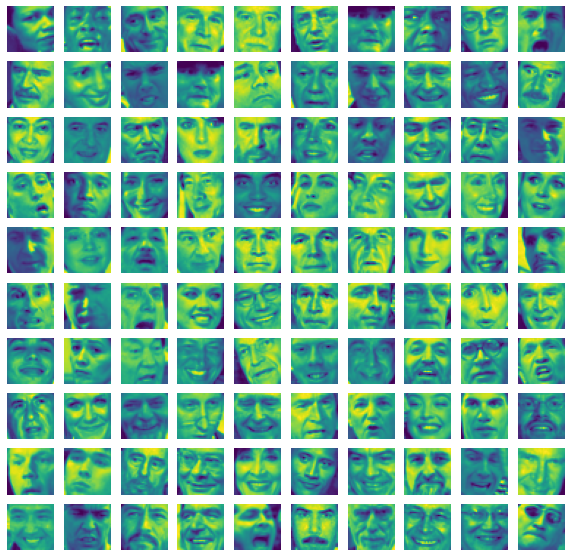

In [4]:
# Visualização de alguns exemplos:

fig,axis = plt.subplots(10,10,figsize=(10,10))
for i in range(10):
    for j in range(10):
        r=np.random.randint(0,5000)
        axis[i,j].imshow(X[r,:].reshape(32,32,order="F"),)
        axis[i,j].axis("off")

In [5]:
# Definindo PCA:
def pca(X):
    m,n = X.shape[0],X.shape[1] 
    sigma = 1/m * X.T @ X
    U,S,V = svd(sigma)
    return U,S,V

In [6]:
from numpy.linalg import svd

U,S = pca(X)[:2]

Text(0.5, 1.0, 'Dados originais pré-PCA')

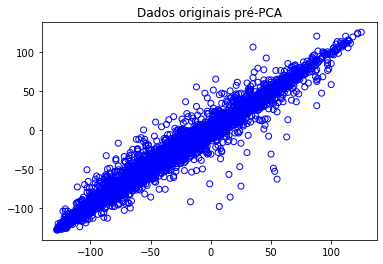

In [7]:
plt.scatter(X[:,0],X[:,1],marker="o",facecolors="none",edgecolors="b")
plt.title("Dados originais pré-PCA")

In [8]:
print("Autovetor principal U(:,1) =:",U[:,0])

Autovetor principal U(:,1) =: [-0.01640988 -0.01692408 -0.01714767 ... -0.0085838  -0.00680308
 -0.005765  ]


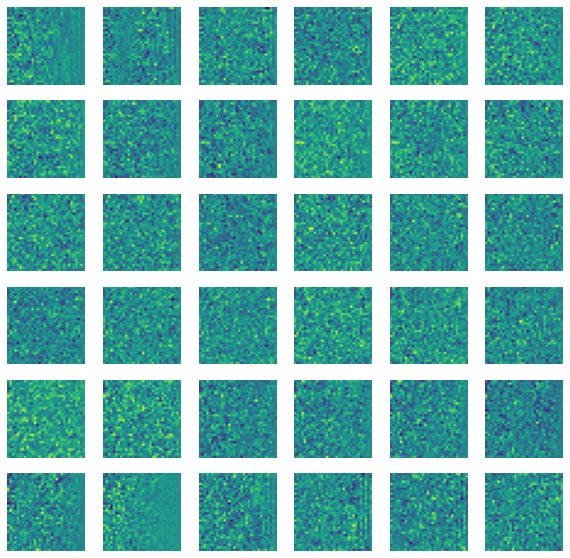

In [9]:
#Plotando Imagens das eingfaces relacionadas aos 36 primeiros componentes principais
fig,axis = plt.subplots(6,6,figsize=(10,10))
k=-1
for i in range(6):
    for j in range(6):
        k+=1
        axis[i,j].imshow(U[k].reshape(32,32,order="F"))
        axis[i,j].axis("off")

In [10]:
# Definindo a projeção Z (X sobre K componentes principais)
def projectData(X,U,K):
    m = X.shape[0]
    U_reduced = U[:,:K]
    Z = np.zeros((m,K))
    
    for i in range(m):
        for j in range(K):
            Z[i,j] = X[i,:] @ U_reduced[:,j]
            
    return Z

In [11]:
# Definindo X reconstruído
def recoverData(Z,U,K):
    m,n = Z.shape[0],U.shape[1]
    X_rec = np.zeros((m,n))
    U_reduced = U[:,:K]
    
    for i in range(m):
        X_rec[i,:] = Z[i,:] @ U_reduced.T
        
    return X_rec

In [12]:
#Definindo o Erro Quadrático Médio obtido com 100 componentes principais
m = X.shape[0]
n = X.shape[1]
k=100
Z = projectData(X,U,k)
X_rec = recoverData(Z,U,k)
C=0
D=0
for j in range(m):
    A=0
    B=0
    for g in range(n):
        A=A+(X[j][g]-X_rec[j][g])**2 
        B=B+(X[j][g])**2 
    C=C+A
    D=D+B
erro=C/D
print("Erro Quadrático Médio obtido com 100 componentes principais: ",erro)
variancia_retida_100=1-erro
print("Variância retida com 100 componentes principais:",variancia_retida_100)

Erro Quadrático Médio obtido com 100 componentes principais:  0.056572648063552
Variância retida com 100 componentes principais: 0.943427351936448


In [13]:
#Procurando o número de componentes principais ideal para que o erro seja <= 1%
m = X.shape[0]
n = X.shape[1]
k_ideal=0
K0=300 #para economizar tempo, vamos variar K apartir de 300
for i in range(n-K0):
    Z = projectData(X,U,i+K0)
    X_rec = recoverData(Z,U,i+K0)
    C=0
    D=0
    for j in range(m):
        A=0
        B=0
        for g in range(n):
            A=A+(X[j][g]-X_rec[j][g])**2 
            B=B+(X[j][g])**2 
        C=C+A
        D=D+B
    erro=C/D
    print("K =",i+K0,"Erro =",erro)
    if 1-erro>=1-0.01: 
        k_ideal=i+K0
        print("Número ideal de componentes principais:",k_ideal)
        variancia_retida=1-erro
        print("Variância retida:",variancia_retida)
        print("Erro Quadrático Médio obtido: ",erro)
        break

K = 300 Erro = 0.01046888935791399
K = 301 Erro = 0.010395418414263143
K = 302 Erro = 0.010322389779872166
K = 303 Erro = 0.010249983759067657
K = 304 Erro = 0.010177800930414527
K = 305 Erro = 0.010105956717566016
K = 306 Erro = 0.010034449215514956
K = 307 Erro = 0.009963356762237927
Número ideal de componentes principais: 307
Variância retida: 0.9900366432377621
Erro Quadrático Médio obtido:  0.009963356762237927


In [14]:
################################################### K=100 , erro <= 5.66 %:

In [15]:
# Definindo Z para K=100
K1=100
Z1 = projectData(X,U,K1)
print("Projeção do primeiro exemplo:",Z1[0][0])

Projeção do primeiro exemplo: 526.0960883292206


In [16]:
# Definindo X Reconstruído para K=100
X_rec_1 = recoverData(Z1,U,K1)
print("Aproximação do primeiro exemplo:",X_rec_1[0,:])

Aproximação do primeiro exemplo: [-41.73733274 -41.82289496 -41.47074472 ... -86.38179274 -73.72410477
 -58.7556254 ]


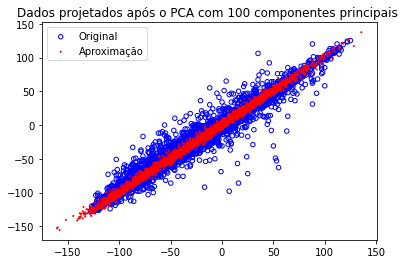

In [17]:
plt.scatter(X[:,0],X[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=20)
plt.scatter(X_rec_1[:,0],X_rec_1[:,1],marker="o",label="Aproximação",facecolors="none",edgecolors="r",s=1)
plt.title("Dados projetados após o PCA com 100 componentes principais ")
plt.legend()

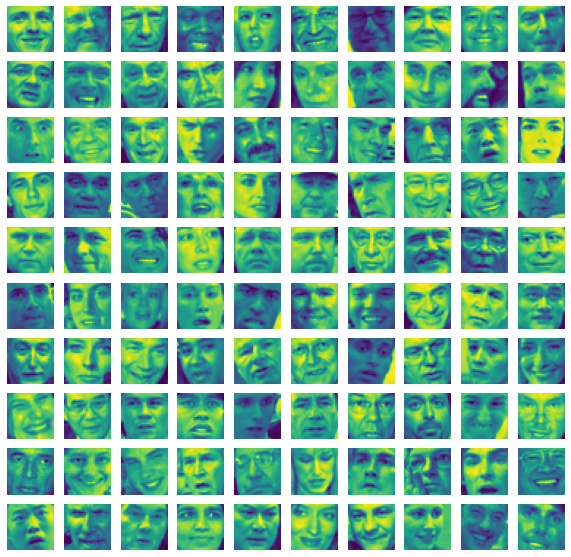

In [18]:
# Plotando Imagens Faciais Originais pré-PCA
fig,axis = plt.subplots(10,10,figsize=(10,10))
k=-1
aleatorias=np.zeros([1,100])
for i in range(10):
    for j in range(10):
        k+=1
        aleatorias[0,k]=np.random.randint(0,5000)
        k2=int(aleatorias[0,k])
        axis[i,j].imshow(X[k2,:].reshape(32,32,order="F")) 
        axis[i,j].axis("off")

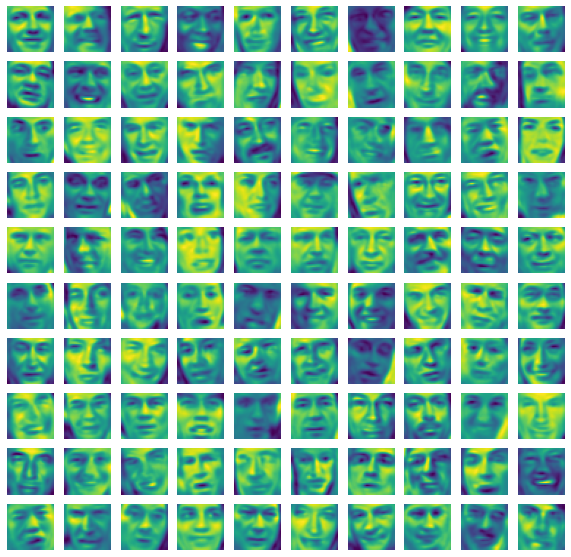

In [19]:
# Plotando Imagens Faciais Reconstruídas após o PCA (K=100)
fig,axis = plt.subplots(10,10,figsize=(10,10))
k=-1
for i in range(10):
    for j in range(10):
        k+=1
        k2=int(aleatorias[0,k])
        axis[i,j].imshow(X_rec_1[k2].reshape(32,32,order="F"))
        axis[i,j].axis("off")

(-0.5, 31.5, 31.5, -0.5)

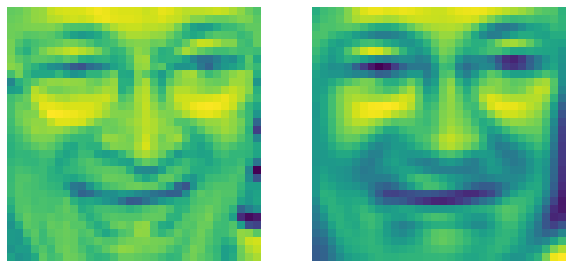

In [20]:
# Plotadndo Exemplo de Comparação de Imagen Original vs. Reconstruída (K=100)
fig,axis = plt.subplots(1,2,figsize=(10,10))
k2=int(aleatorias[0,37])
axis[0].imshow(X[k2].reshape(32,32,order="F"))
axis[0].axis("off")
k2=int(aleatorias[0,37])
axis[1].imshow(X_rec_1[k2].reshape(32,32,order="F"))
axis[1].axis("off")

In [21]:
################################################### K=307 , erro <= 1%:

In [22]:
# Definindo Z para K=307
K2=307
Z2 = projectData(X,U,K2)
print("Projeção do primeiro exemplo:",Z2[0][0])

Projeção do primeiro exemplo: 526.0960883292206


In [23]:
# Definindo X Reconstruído para K=307
X_rec_2 = recoverData(Z2,U,K2)
print("Aproximação do primeiro exemplo:",X_rec_2[0,:])

Aproximação do primeiro exemplo: [ -31.64409847  -46.04498955  -57.36556388 ... -115.42852757 -110.39497967
  -89.64325314]


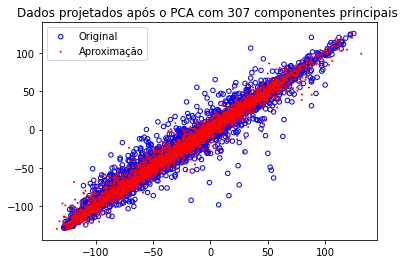

In [24]:
plt.scatter(X[:,0],X[:,1],marker="o",label="Original",facecolors="none",edgecolors="b",s=20)
plt.scatter(X_rec_2[:,0],X_rec_2[:,1],marker="o",label="Aproximação",facecolors="none",edgecolors="r",s=1)
plt.title("Dados projetados após o PCA com 307 componentes principais ")
plt.legend()

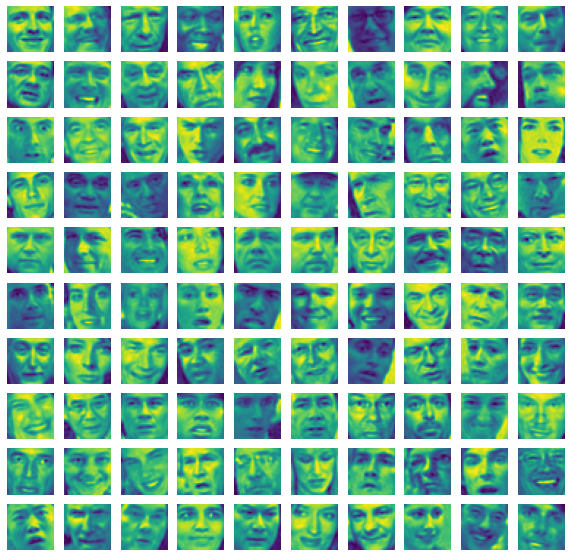

In [25]:
# Plotando Imagens Faciais Reconstruídas após o PCA (K=307 , erro <= 1%)
fig,axis = plt.subplots(10,10,figsize=(10,10))
k=-1
for i in range(10):
    for j in range(10):
        k+=1
        k2=int(aleatorias[0,k])
        axis[i,j].imshow(X_rec_2[k2].reshape(32,32,order="F"))
        axis[i,j].axis("off")

# Parte II - Sistemas de Recomendação:

In [26]:
# Importação dos dados utilizados:

dado2 = loadmat("dado2.mat")
filmes = open("dado3.txt","r").read().split("\n")[:-1]

# Definição das variáveis:

Y = dado2["Y"] # Matriz que armazena na linha i e coluna j a nota dada pelo usuário j para o filme i
R = dado2["R"] # Matriz que armazena na linha i e coluna j o valor 1 se o usuário j deu alguma nota para o filme i, e o valor 0 caso contrário

n_u = len(R[0]) # Número de usuários
n_f = len(R) # Número de filmes
n_a = 100 # Número de atributos para cada filme, e número de parâmetros para cada usuário

X = np.random.randn(n_f, n_a) # Matriz que armazena em cada linha i o vetor de atributos do i-ésimo filme
Theta = np.random.randn(n_u, n_a) # Matriz que armazena em cada linha i o vetor de parâmetros do i-ésimo usuário

initial_params = np.append(X.flatten(),Theta.flatten()) # Vetorização das matrizes X e Theta, utilizada para o método do gradiente conjugado
J_history = [] # Vetor que armazena os valores da função de custo em cada iteração

# Hiper-parâmetros do modelo:

alpha = 0.0001 # Taxa de aprendizado
n_i = 400 # Número de iterações

In [27]:
# Normalização pela média:

Y_mean = np.zeros((n_f,1)) # Vetor que irá se tornar o vetor médio de nota por filme
Y_norm = np.zeros((n_f,n_u)) # Matriz que irá se tornar a matriz Y normalizada

for i in range(n_f):
    Y_mean[i] = np.sum(Y[i,:])/np.count_nonzero(R[i,:])
    Y_norm[i,R[i,:]==1] = Y[i,R[i,:]==1] - Y_mean[i]

In [28]:
# Função de custo:

def cost_function(params, Y, R, n_u, n_f, n_a):

    X = params[:n_f*n_a].reshape(n_f,n_a)
    Theta = params[n_f*n_a:].reshape(n_u,n_a)
    
    predictions =  X @ Theta.T
    err = (predictions - Y)
    J = 1/2 * np.sum((err**2) * R)
    
    X_grad = err*R @ Theta
    Theta_grad = (err*R).T @ X
    grad = np.append(X_grad.flatten(),Theta_grad.flatten())
    
    return J, grad

# Função de histórico do custo:

def cost_history(params, Y, R, n_u, n_f, n_a):
    
    J, grad = cost_function(params, Y, R, n_u, n_f, n_a)
    J_history.append(J)
    
    return J, grad

In [29]:
# Minimização com gradiente conjugado:

results = minimize(cost_history, initial_params, args = (Y_norm, R, n_u, n_f, n_a), method='CG',
          jac=True, tol=None, callback=None, options={'maxiter':n_i,'disp':True, 'gtol':alpha})

final_params = results.x
X = final_params[:n_f*n_a].reshape(n_f,n_a)
Theta = final_params[n_f*n_a:].reshape(n_u,n_a)

         Current function value: 54.944175
         Iterations: 400
         Function evaluations: 600
         Gradient evaluations: 600


In [30]:
# Matriz de predição:

predictions = X @ Theta.T # # Matriz que irá armazenar na linha i e coluna j a nota predita pelo usuário j para o filme i
for i in range(n_u): # Correção da matriz de predição somando cada coluna com o vetor médio
    predictions[:,i][:,np.newaxis] = predictions[:,i][:,np.newaxis] + Y_mean

# Cálculo da nota média predita para cada filme:

predictions_mean = np.zeros((n_f,1)) # Vetor que irá armazenar na linha i a nota predita redição da nota média de cada filme
for i in range(n_f): 
    predictions_mean[i] = np.sum(predictions[i,:])/n_u

# Normalização para deixar as notas em uma escala de 0 a 5:

notas = np.zeros((n_f,1)) # Vetor que irá substituir o vetor "predictions_mean"
for i in range(n_f):
    notas[i] = 5 * (predictions_mean[i] - np.min(predictions_mean))/(np.max(predictions_mean) - np.min(predictions_mean))

In [33]:
# Lista dos 10 filmes com notas médias mais altas (sem normalização):

df = pd.DataFrame(np.hstack((predictions_mean,np.array(filmes)[:,np.newaxis])))
df.sort_values(by=[0],ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)

for i in range(10):
    print("Nota média predita",round(float(df[0][i]),1)," para o filme",df[1][i])

Nota média predita 5.3  para o filme 1122 They Made Me a Criminal (1939)
Nota média predita 5.3  para o filme 1536 Aiqing wansui (1994)
Nota média predita 5.2  para o filme 1189 Prefontaine (1997)
Nota média predita 5.2  para o filme 1653 Entertaining Angels: The Dorothy Day Story (1996)
Nota média predita 5.1  para o filme 814 Great Day in Harlem, A (1994)
Nota média predita 5.1  para o filme 1599 Someone Else's America (1995)
Nota média predita 5.1  para o filme 1500 Santa with Muscles (1996)
Nota média predita 5.0  para o filme 1293 Star Kid (1997)
Nota média predita 4.9  para o filme 1201 Marlene Dietrich: Shadow and Light (1996) 
Nota média predita 4.8  para o filme 1449 Pather Panchali (1955)


In [34]:
# Lista dos 10 filmes com notas médias mais altas (com normalização na escala de 0 a 5):

df = pd.DataFrame(np.hstack((notas,np.array(filmes)[:,np.newaxis])))
df.sort_values(by=[0],ascending=False,inplace=True)
df.reset_index(drop=True,inplace=True)

for i in range(10):
    print("Nota média predita",round(float(df[0][i]),1)," para o filme",df[1][i])

Nota média predita 5.0  para o filme 1122 They Made Me a Criminal (1939)
Nota média predita 5.0  para o filme 1536 Aiqing wansui (1994)
Nota média predita 4.9  para o filme 1189 Prefontaine (1997)
Nota média predita 4.9  para o filme 1653 Entertaining Angels: The Dorothy Day Story (1996)
Nota média predita 4.8  para o filme 814 Great Day in Harlem, A (1994)
Nota média predita 4.8  para o filme 1599 Someone Else's America (1995)
Nota média predita 4.8  para o filme 1500 Santa with Muscles (1996)
Nota média predita 4.7  para o filme 1293 Star Kid (1997)
Nota média predita 4.6  para o filme 1201 Marlene Dietrich: Shadow and Light (1996) 
Nota média predita 4.5  para o filme 1449 Pather Panchali (1955)


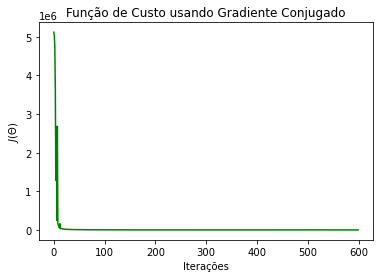

In [35]:
# Função de custo x número de iterações:

plt.plot(J_history, color='green')
plt.xlabel("Iterações")
plt.ylabel("$J(\Theta)$")
plt.title("Função de Custo usando Gradiente Conjugado");